# HR аналитика компании "Работа с заботой"

# Описание проекта.

HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. \
В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.


Компания предоставила данные с характеристиками сотрудников компании. Среди них:
— уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён. \
Собирать данные такими опросниками не так легко: компания большая, и всех сотрудников надо сначала оповестить об опросе, а затем проследить, что все его прошли. 

# Задачи проекта.

1. Построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. 


Почему бизнесу это важно: удовлетворённость работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник.


2. Построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

Теперь подробнее о входных данных.

**Задача 1: предсказание уровня удовлетворённости сотрудника**


Для этой задачи заказчик предоставил данные с признаками:
- id — уникальный идентификатор сотрудника;
- dept — отдел, в котором работает сотрудник;
- level — уровень занимаемой должности;
- workload — уровень загруженности сотрудника;
- employment_years — длительность работы в компании (в годах);
- last_year_promo — показывает, было ли повышение за последний год;
- last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
- supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
- salary — ежемесячная зарплата сотрудника;
- job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.

**Задача 2: предсказание увольнения сотрудника из компании.**


Для этой задачи вы можете использовать те же входные признаки, что и в предыдущей задаче. Однако целевой признак отличается: 
- quit — увольнение сотрудника из компании.

На основании предоставленных данных будут выполнены следующие этапы.

**ПЛАН ПРОЕКТА:**


1. Загрузка данных. 
2. Предобработка данных. 
3. Исследовательский анализ - 1 задача. 
4. Подготовка данных. 
5. Обучение модели. Задача 1.

6. Загрузка данных. Задача 2. 
7. Предобработка данных. Задача 2. 
8. Исследовательский анализ. Задача 2. 
    8.1 Портрет уволившегося сотрудника. 
    8.2 Уровень удовлетворенности ушедших и оставшихся. 
9. Добавление нового входного признака. 
10. Подготовка данных. Задача 2. 
11. Обучение модели. Задача 2.
12. Общие выводы.


## Загрузка данных.

Сначала импортируем и установим необходимые библиотеки.

In [1]:
!pip install scikit-learn==1.5.0

In [2]:
!pip install phik -q

In [3]:
!pip install shap -q

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
#from optuna.integration import OptunaSearchCV

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.impute import SimpleImputer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.metrics import make_scorer


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.dummy import DummyClassifier

from sklearn.inspection import permutation_importance

from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

In [5]:
#import shap

In [6]:
import sklearn

In [7]:
sklearn.__version__

'1.5.0'

In [8]:
import phik

Объявим константы.

In [9]:
RANDOM_STATE = 42
TEST_SIZE =0.25

Загрузим данные.

In [10]:
try:
    train_job_satisfaction = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
    test_features = pd.read_csv('/datasets/test_features.csv')
    test_target = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')
except:
    train_job_satisfaction = pd.read_csv(r"C:\Users\user1\Documents\Учеба Data science\Проекты спринтов\1 Сборный проект 2\Datasets\train_job_satisfaction_rate.csv") 
    test_features = pd.read_csv(r"C:\Users\user1\Documents\Учеба Data science\Проекты спринтов\1 Сборный проект 2\Datasets\test_features.csv")
    test_target = pd.read_csv(r"C:\Users\user1\Documents\Учеба Data science\Проекты спринтов\1 Сборный проект 2\Datasets\test_target_job_satisfaction_rate.csv")
 

Изучим данные.

In [11]:
def all_info(a):
    display(a.info())
    display(a.head())
    print('Явные дубликаты:', a.duplicated().sum())
    print('Пропуски:', a.isna().sum())

In [12]:
all_info(train_job_satisfaction)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


None

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


Явные дубликаты: 0
Пропуски: id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64


In [13]:
all_info(test_features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


None

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


Явные дубликаты: 0
Пропуски: id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64


In [14]:
all_info(test_target)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


None

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


Явные дубликаты: 0
Пропуски: id                       0
job_satisfaction_rate    0
dtype: int64


 **Вывод:**
 - данные загружены. В Тренировочной выборке - 4000 значений. В тестовой выборке 2000.
 - проведен первичный осмотр, обнаружены пропуски - обработаем их на этапе пайплайнов.
 - явные дубликаты не обнаружены.
 - несоответствия типов данных не обнаружено.
 - заполнение пропусков будем осуществлять в пайплайне.

## Предобработка данных.

Посмотрим на названия столбцов.

In [15]:
train_job_satisfaction.columns

Index(['id', 'dept', 'level', 'workload', 'employment_years',
       'last_year_promo', 'last_year_violations', 'supervisor_evaluation',
       'salary', 'job_satisfaction_rate'],
      dtype='object')

In [16]:
test_features.columns

Index(['id', 'dept', 'level', 'workload', 'employment_years',
       'last_year_promo', 'last_year_violations', 'supervisor_evaluation',
       'salary'],
      dtype='object')

In [17]:
test_target.columns

Index(['id', 'job_satisfaction_rate'], dtype='object')

Названия имеют змеиный регистр, латинский алфавит и не имеют пробелов. С этим - ок.

Изучим уникальные значения в категориальных столбцах на предмет поиска неявных дубликатов и ошибок в данных.

In [18]:
train_job_satisfaction['dept'].unique()

array(['sales', 'hr', 'technology', 'purchasing', 'marketing', nan],
      dtype=object)

In [19]:
train_job_satisfaction['level'].unique()

array(['junior', 'middle', 'sinior', nan], dtype=object)

Исправим название уровня должности на `senior`

In [20]:
train_job_satisfaction['level'] = train_job_satisfaction['level'].replace('sinior', 'senior')

In [21]:
train_job_satisfaction['workload'].unique()

array(['medium', 'high', 'low'], dtype=object)

In [22]:
train_job_satisfaction['last_year_promo'].unique()

array(['no', 'yes'], dtype=object)

In [23]:
train_job_satisfaction['last_year_violations'].unique()

array(['no', 'yes'], dtype=object)

Теперь те же действия с `test_features`

In [24]:
test_features['dept'].unique()

array(['marketing', 'hr', 'sales', 'purchasing', 'technology', nan, ' '],
      dtype=object)

Заменим пробел на пропуск, чтобы SimpleImputer корректно отработал в пайплайне.

In [25]:
test_features['dept'] = test_features['dept'].replace(' ', np.nan)

In [26]:
test_features['level'].unique()

array(['junior', 'middle', 'sinior', nan], dtype=object)

Аналогично - исправим на Senior

In [27]:
test_features['level'] = test_features['level'].replace('sinior', 'senior')

In [28]:
test_features['workload'].unique()

array(['medium', 'low', 'high', ' '], dtype=object)

Здесь - замена пробела на пропуск.

In [29]:
test_features['workload'] = test_features['workload'].replace(' ', np.nan)

In [30]:
test_features['last_year_promo'].unique()

array(['no', 'yes'], dtype=object)

In [31]:
test_features['last_year_violations'].unique()

array(['no', 'yes'], dtype=object)

**Вывод:**
1. Проведена предобработка.
2. Выявлены значения с пробелами - заменены на np.nan.
3. Исправлены опечатки в категории `Sinior` на `Senior`.
4. Неявных дубликатов значений при просмотре по столбцам не выявлено.

## Исследовательский анализ - 1 задача.

Посмотрим на распредения числовых признаков.

In [32]:
num_col = ['salary', 'job_satisfaction_rate']

Посмотрим методом describe.

In [33]:
train_job_satisfaction[num_col].describe().T

,count,mean,std,min,25%,50%,75%,max
salary,4000.0,33926.700000,14900.703838,12000.00,22800.00,30000.00,43200.00,98400.0
job_satisfaction_rate,4000.0,0.533995,0.225327,0.03,0.36,0.56,0.71,1.0


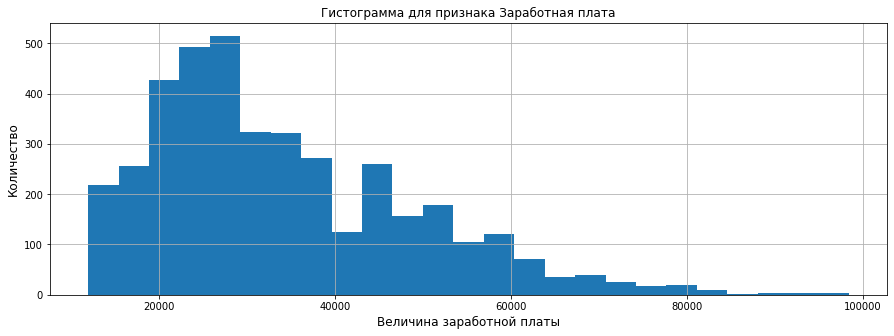

In [34]:
plt.figure(figsize=(15,5));
plt.hist(train_job_satisfaction['salary'], bins=25);
plt.title('Гистограмма для признака Заработная плата');
plt.ylabel('Количество', fontsize='large');
plt.xlabel('Величина заработной платы',  fontsize='large');
plt.grid();

График имеет смещение влево.

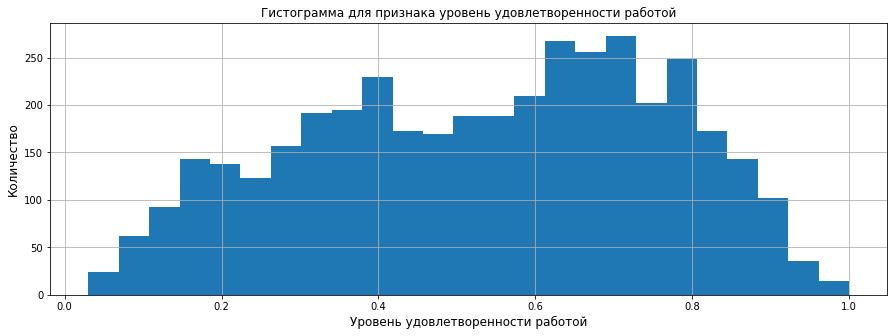

In [35]:
plt.figure(figsize=(15,5));
plt.hist(train_job_satisfaction['job_satisfaction_rate'], bins=25);
plt.title('Гистограмма для признака уровень удовлетворенности работой');
plt.ylabel('Количество', fontsize='large');
plt.xlabel('Уровень удовлетворенности работой',  fontsize='large');
plt.grid();

Целевой признак не имеет нормального распределения.

Построим боксплоты.

In [36]:
list_1 = ['salary', 'job_satisfaction_rate']
titles_1 = ['Заработная плата', 'Уровень удовлетворенности работой']

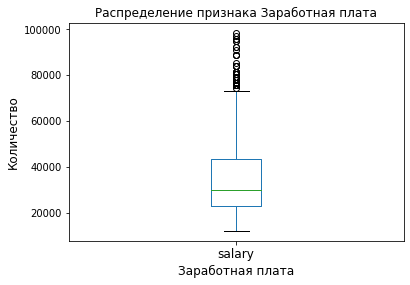

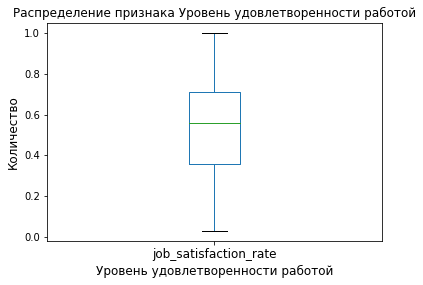

In [37]:
for i in range(len(list_1)):
    train_job_satisfaction[list_1[i]].plot(kind='box');
    plt.title(f'Распределение признака {titles_1[i]}', fontsize='large');
    plt.xlabel(titles_1[i], fontsize='large');
    plt.ylabel('Количество', fontsize='large');
    plt.xticks(rotation=0, fontsize='large');
    plt.show()

**Вывод по числовым данным:**
- средняя заработная плата - чуть меньше 34 тыс., 
- только четверть сотрудников имеет зарплату больше 43200
- Ящик с усами показывает заработные платы выше 80000 как выбросы, то есть эти значения выше, чем 3 квартиль плюс 1,5 межквартильных размаха.
- максимальная зарплата 98400

Что касается целевого признака
- у 75% работников значение удовлетворенности работой меньше 0.71
- целевой признак не имеет нормального распределения. Стандартное отклонение признака - 0.225

Теперь посмотрим на категориальные признаки

In [38]:
cat_col=['dept', 'level', 'workload', 'employment_years', 'last_year_promo', 'last_year_violations', 'supervisor_evaluation']

titles= ['Отдел, в котором работает сотрудник', 'Уровень занимаемой должности', 'Уровень загруженности сотрудника', 
         'Длительность работы, лет','Было ли повышение за последний год', 
         'Нарушал ли сотрудник трудовой договор за последний год', 
         'Оценка качества работы сотрудника, которую дал руководитель']

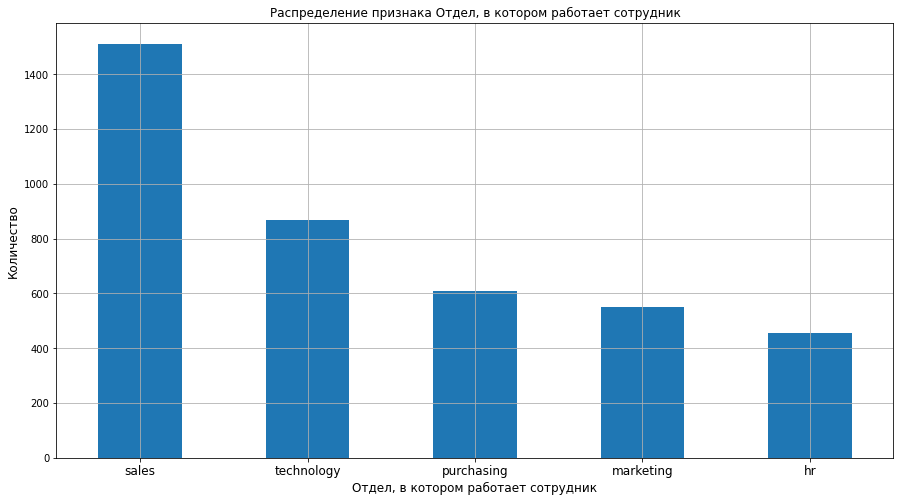

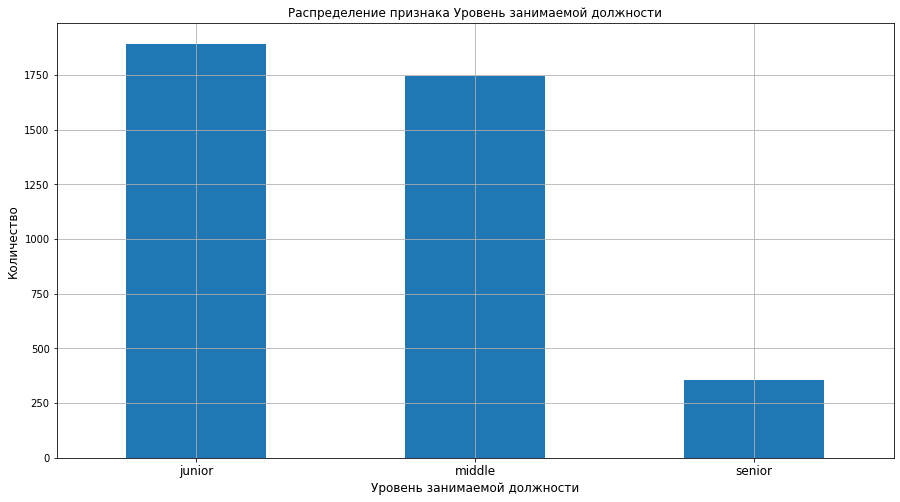

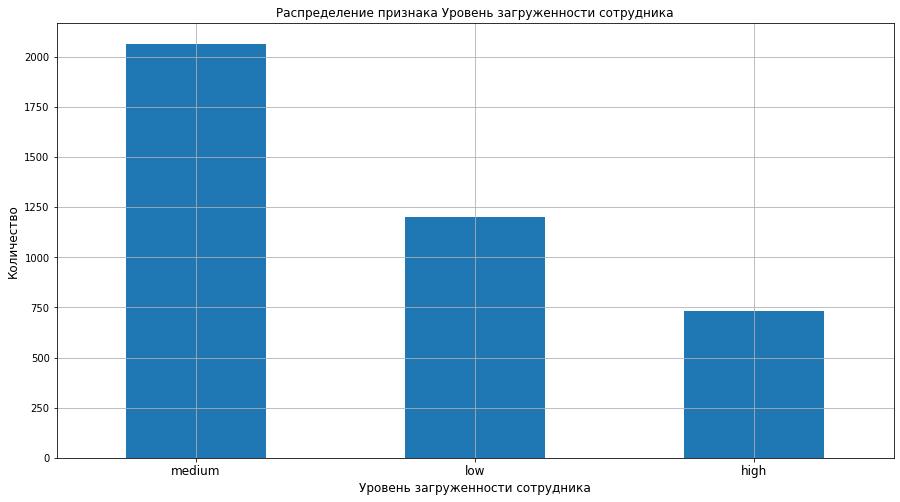

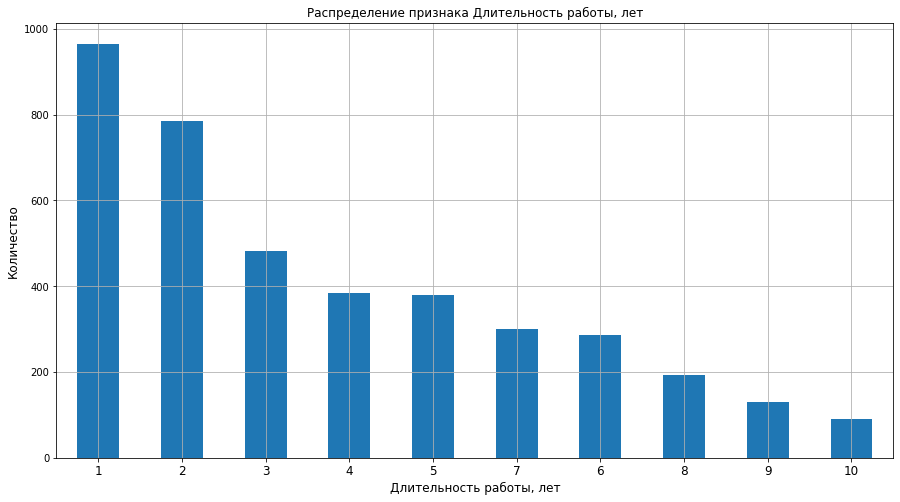

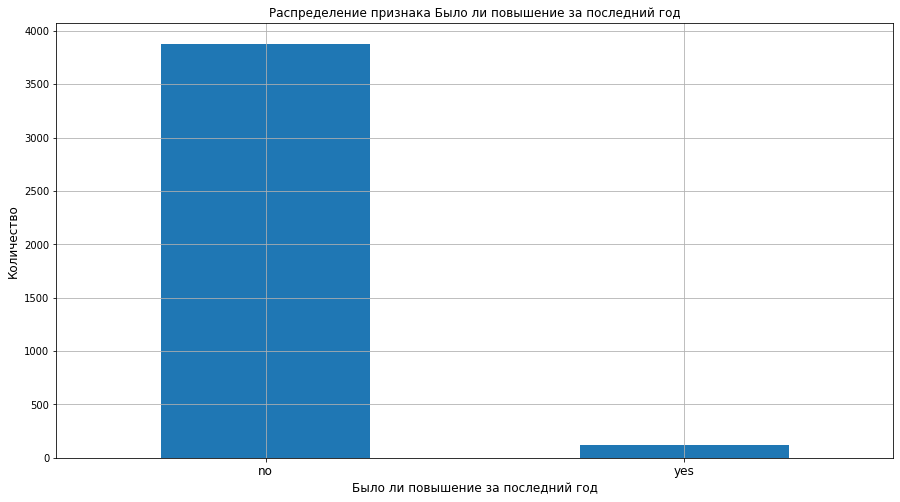

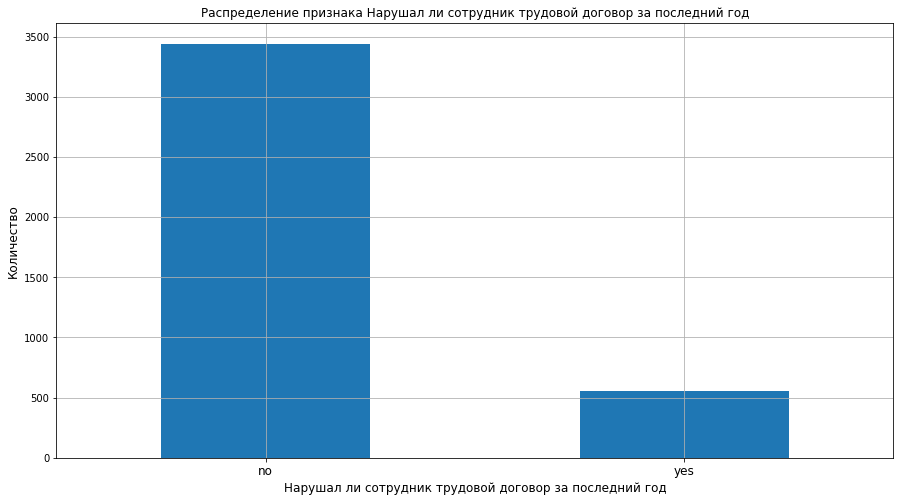

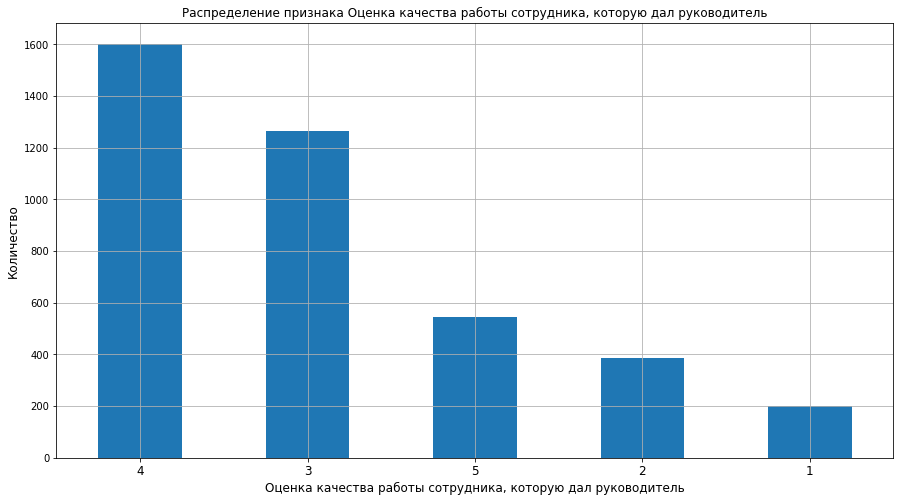

In [39]:
for i in range(len(cat_col)):
    train_job_satisfaction[cat_col[i]].value_counts().plot(kind='bar', figsize=(15,8), grid=True);
    plt.title(f'Распределение признака {titles[i]}', fontsize='large');
    plt.xlabel(titles[i], fontsize='large');
    plt.ylabel('Количество', fontsize='large');
    plt.xticks(rotation=0, fontsize='large');
    plt.show()

Построим матрицу корреляции признаков

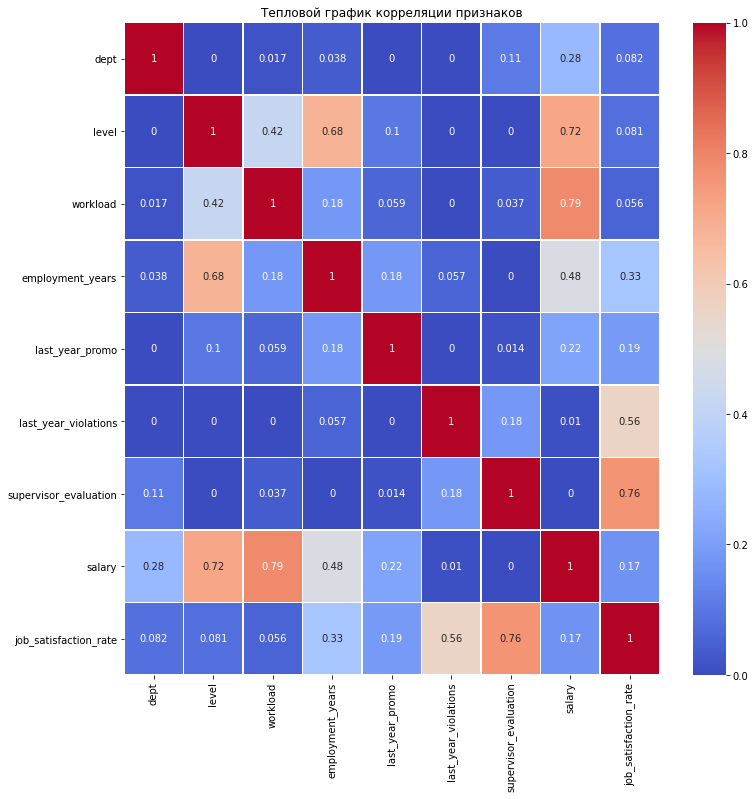

In [40]:
train_job_satisfaction_1 =train_job_satisfaction.drop(['id'], axis=1)
corr_matrix = train_job_satisfaction_1.phik_matrix(interval_cols = num_col)
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Тепловой график корреляции признаков');


По корреляционному анализу видим: 
- целевой признак - зависит от оценки качества работы сотрудника и повышением за прошедший год.
- зарплата коррелирует с загруженностью и уровнем квалификации работника. 

Переходим к тестовой выборке.

In [41]:
test_features.head(1)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800


In [42]:
test_features['salary'].describe()

count     2000.000000
mean     34066.800000
std      15398.436729
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      96000.000000
Name: salary, dtype: float64

Describe () аналогичный тренировочной.

Построим совместные графики распределtния числовых признаков.

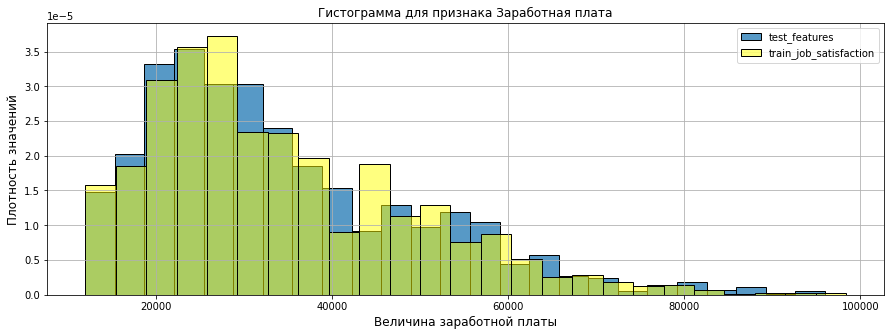

In [43]:
plt.figure(figsize=(15,5));
sns.histplot(test_features['salary'], bins=25, label = 'test_features', stat='density', common_norm=False);
sns.histplot(train_job_satisfaction['salary'], bins=25, alpha = 0.5, label = 'train_job_satisfaction', stat='density', common_norm=False, color='yellow');
plt.title('Гистограмма для признака Заработная плата');
plt.ylabel('Плотность значений', fontsize='large');
plt.xlabel('Величина заработной платы',  fontsize='large');
plt.grid();
plt.legend();

Распределение заработной платы аналогичное тренировочной выборке.

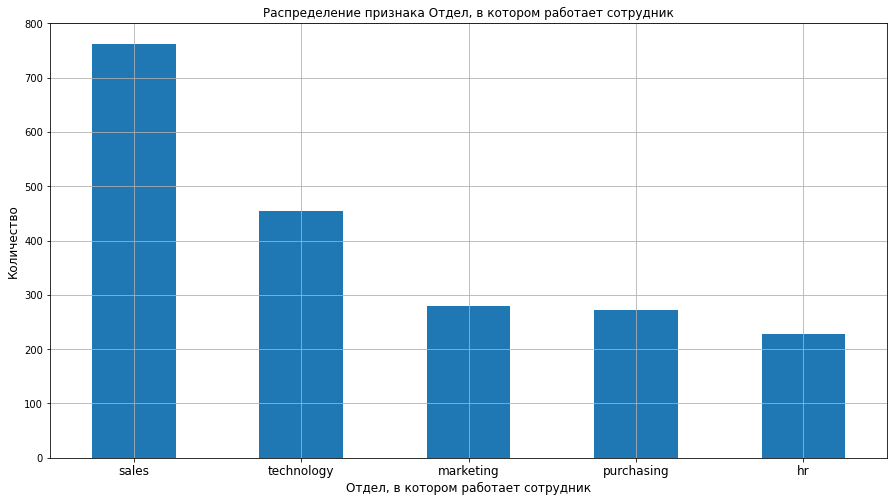

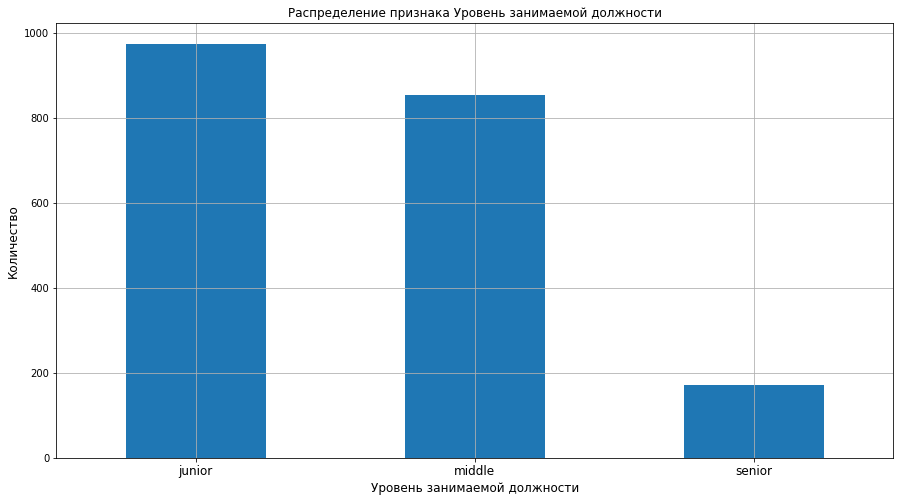

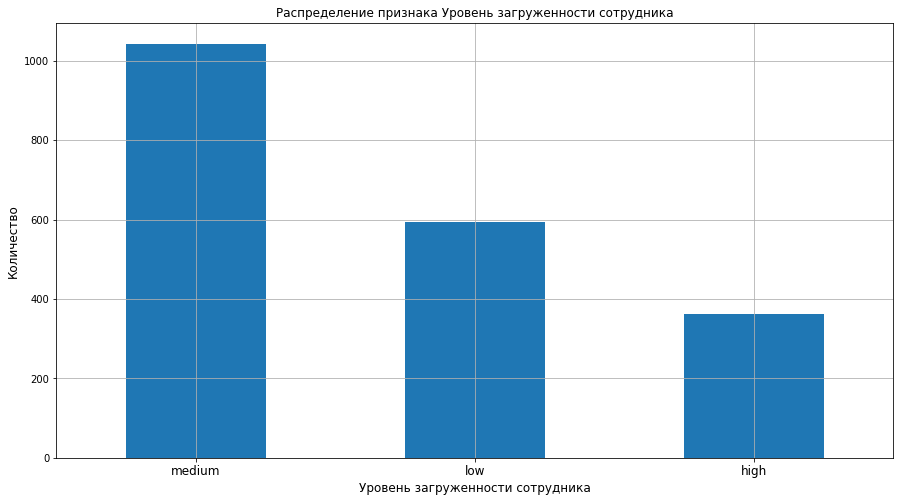

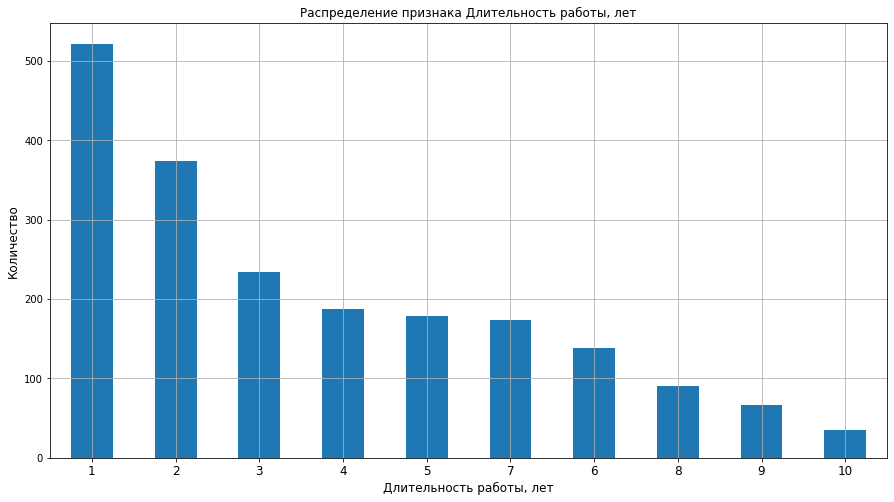

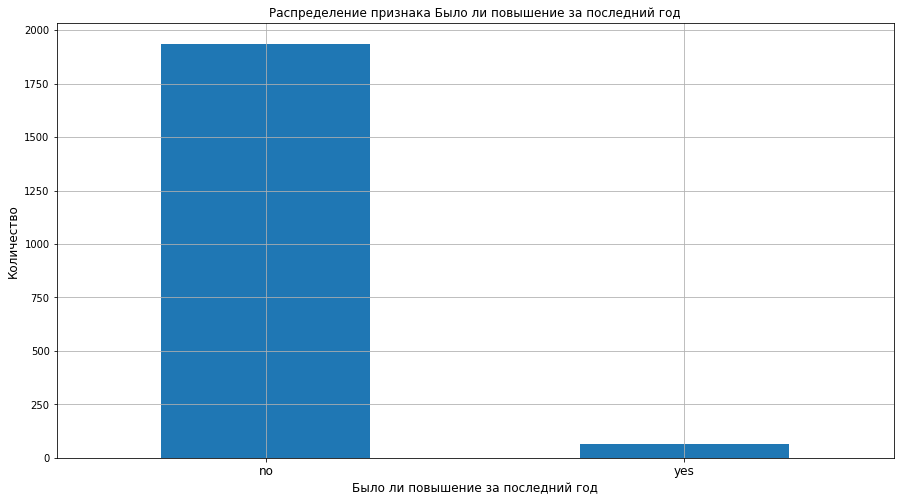

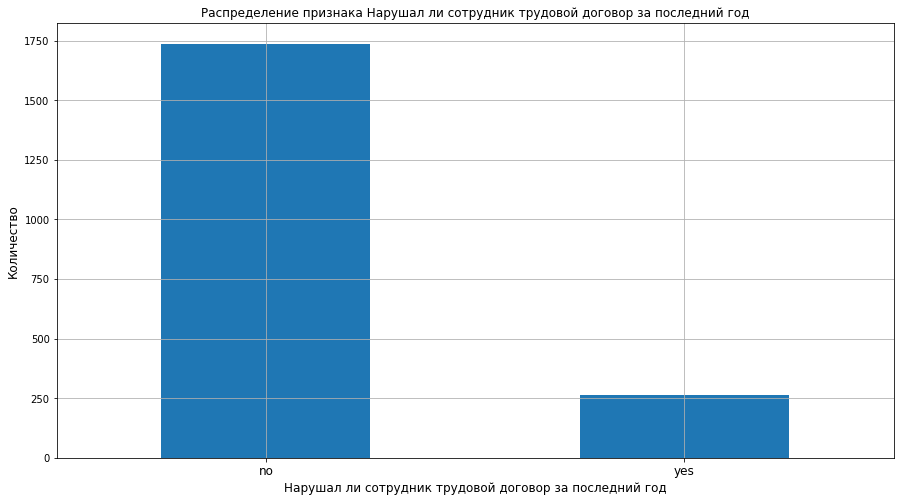

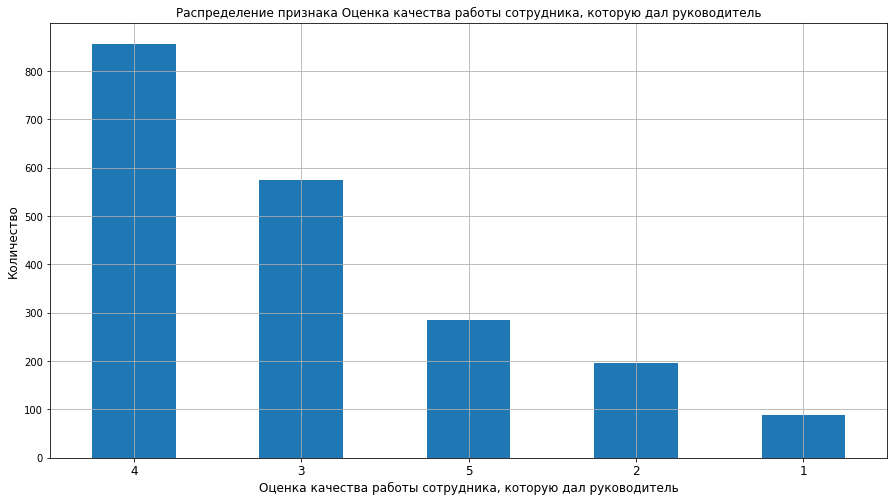

In [44]:
for i in range(len(cat_col)):
    test_features[cat_col[i]].value_counts().plot(kind='bar', figsize=(15,8), grid=True);
    plt.title(f'Распределение признака {titles[i]}', fontsize='large');
    plt.xlabel(titles[i], fontsize='large');
    plt.ylabel('Количество', fontsize='large');
    plt.xticks(rotation=0, fontsize='large');
    plt.show()

In [45]:
test_target.head(1)

,id,job_satisfaction_rate
0,130604,0.74


In [46]:
test_target['job_satisfaction_rate'].describe()


count    2000.00000
mean        0.54878
std         0.22011
min         0.03000
25%         0.38000
50%         0.58000
75%         0.72000
max         1.00000
Name: job_satisfaction_rate, dtype: float64

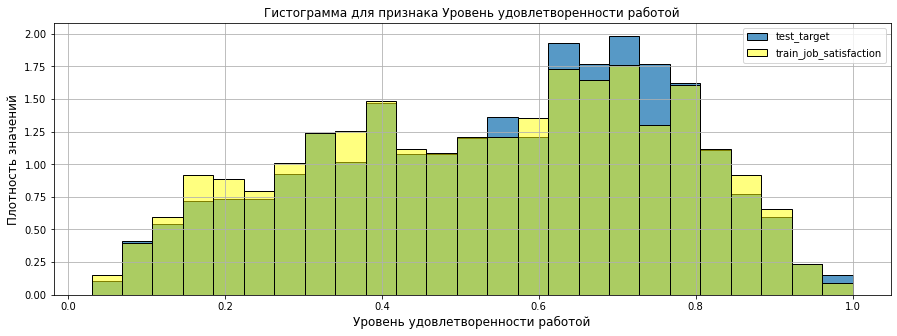

In [47]:
plt.figure(figsize=(15,5));
sns.histplot(test_target['job_satisfaction_rate'], bins=25, label = 'test_target', stat='density', common_norm=False);
sns.histplot(train_job_satisfaction_1['job_satisfaction_rate'], bins=25, alpha = 0.5, label = 'train_job_satisfaction', stat='density', common_norm=False, color='yellow');
plt.title('Гистограмма для признака Уровень удовлетворенности работой');
plt.ylabel('Плотность значений', fontsize='large');
plt.xlabel('Уровень удовлетворенности работой',  fontsize='large');
plt.legend()
plt.grid();

Text(0.5, 1.0, 'Тепловой график корреляции признаков')

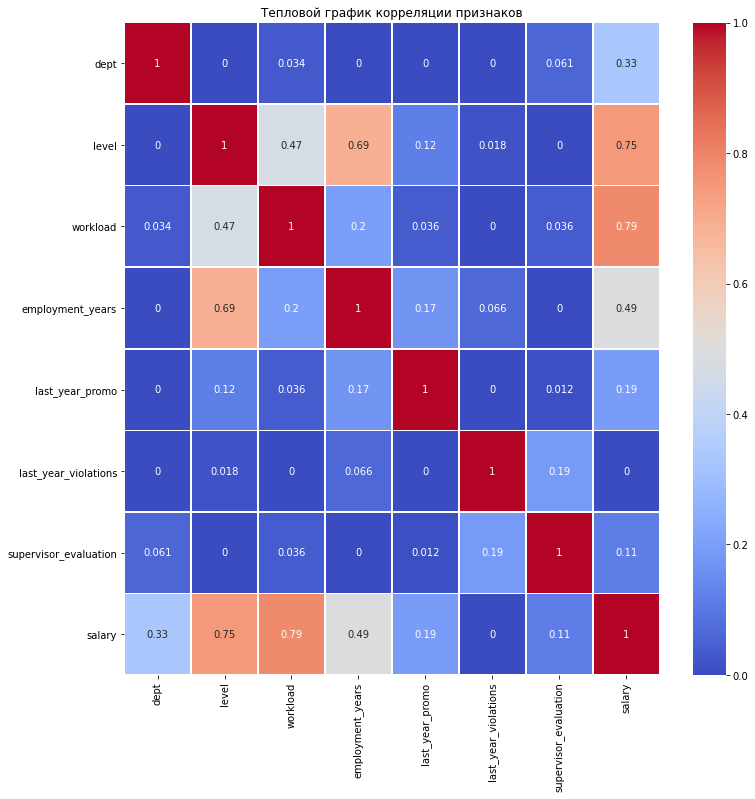

In [48]:
test_features_1 =test_features.drop(['id'], axis=1)
corr_matrix = test_features_1.phik_matrix(interval_cols = ['salary'])
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Тепловой график корреляции признаков')


**Вывод по исследовательскому анализу:**
- целевой признак не имеет нормального распределения. Стандартное отклонение признака - 0.225
- средняя заработная плата  - чуть меньше 34 тыс.
- средний рабочий стаж составляет 3.72 года.
- большинство оценок руководителей - 4 (хорошо), на втором месте - оценка 3.
- работников уровня senior меньше всего
- нарушений малое количество, как и малое количество повышений
- большинство работников имеют среднюю загрузку.
- большинство работников - продавцы.
- отличий в распределении данных в тестовой и тренировочной выборках не выявлено.


## Подготовка данных.

Создадим пайплайн.

Будем использовать для подготовки следующие методы:
1. Кодирование:
    - для столбцов 'dept', last_year_promo', 'last_year_violations' - OneHotEncoder
    - для 'level', 'workload',  - OrdinalEncoder
2. масштабирование:
    - для 'employment_years', 'supervisor_evaluation', 'salary' - StandardScaler

In [49]:
train_job_satisfaction.head(1)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58


In [50]:
train_job_satisfaction['workload'].value_counts().index.to_list()

['medium', 'low', 'high']

In [51]:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations'] 
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary']

In [52]:
ohe_pipe = Pipeline(
[
    ('SimpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
]
)

In [53]:
ord_pipe = Pipeline(
[
    ('SimpleImputer_ord_before', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('ord', OrdinalEncoder(categories=[['junior', 'middle', 'senior'], ['low','medium','high']], 
                           handle_unknown='use_encoded_value', unknown_value=np.nan)),
     ('SimpleImputer_ord_after', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
]
)

In [54]:
data_preprocessor = ColumnTransformer(
[
    ('ohe', ohe_pipe, ohe_columns),
    ('ord', ord_pipe, ord_columns),
    ('num', StandardScaler(), num_columns)  
], 
    remainder = 'passthrough'
)

In [55]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LinearRegression())
])

In [56]:
param_grid = [

    {
        'models': [LinearRegression()],
        'models__C': [0.1,0.4,0.5,0.6,0.8,1,2,3,4,10],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 21),
        'models__min_samples_split': range(2, 21),
        #'models__min_samples_leaf': range(2, 21),
        'models__max_features': range(2, 21),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
    
]

## Обучение модели.

In [57]:
train_data = train_job_satisfaction.drop('id', axis=1)

In [58]:
train_data.duplicated().sum()

245

In [59]:
train_data.drop_duplicates(inplace=True)

In [60]:
train_data.duplicated().sum()

0

Создадим выборки

In [61]:
X_train = train_data.drop('job_satisfaction_rate', axis=1)
y_train = train_data['job_satisfaction_rate'] 

Создадим функцию для метрики SMAPE

In [62]:
def custom_metric(y_true, y_pred):
    metric = 2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred))
    metric = metric.sum()*100/len(y_true)
    return metric


In [63]:
smape_scorer = make_scorer(custom_metric, greater_is_better=False)

In [64]:
r_search = RandomizedSearchCV(
    pipe_final, 
    param_grid,
    n_iter=10,
    cv=5,
    scoring=smape_scorer,
    random_state=RANDOM_STATE,
    n_jobs=-1)

In [65]:
r_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('SimpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               Pip...
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [DecisionTreeRegressor(random_state=42)],
                                         'models__max_depth': range(2, 21),
                                         'models__max_features': range(2, 21),
                                         'models__min_samples_split': range(2, 21),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42,
                   scoring=make_scorer(custom_metric, greater_is_better=False, response_method='predict'))

In [66]:
print('Лучшая модель и её параметры:\n\n', r_search.best_estimator_)
print(f'Параметры лучшей модели:\n{r_search.best_params_}')
print ('Метрика лучшей модели при кросс-валидации:', - round(r_search.best_score_, 2))

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('SimpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                            

ЛУчшая модель с помощью Рандомного поиска выбрана DecisionTreeRegressor(max_depth=16, max_features=12, min_samples_split=13,
random_state=42))])

Метрика SMAPE лучшей модели при кросс-валидации составила 15.18.

Теперь посчитаем на тестовой выборке.

In [67]:
test_features = test_features.merge(test_target, on='id', how='left')
X_test = test_features.drop(['id', 'job_satisfaction_rate'], axis=1)
y_test = test_features['job_satisfaction_rate']

In [68]:
best_model = r_search.best_estimator_

In [69]:
print ('Метрика лучшей модели на тестовой выборке:', round(custom_metric(y_test, best_model.predict(X_test)),2))

Метрика лучшей модели на тестовой выборке: 13.65


Итог:
- обучена лучшая модель - Дерево решений. Метрика составила 13.65 на тестовой выборке.

В качестве альтернативы изучим на модель линейной регрессии. Подберем для нее гиперпараметры и посмотрим на метрику.

In [70]:
param_grid = {
                'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    }

In [71]:
grid_search = GridSearchCV(
    pipe_final, 
    param_grid,
    cv=5,
    scoring=smape_scorer,
    n_jobs=-1)

In [72]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('SimpleImputer_ohe',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['dept',
                                                                          'last_year_promo',
                                                                          'last_year_violations']),
                                                                        ('ord',
                                                                         Pipeline(...
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['level',
                                                                          'workload']),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['employment_years',
                                                                          'supervisor_evaluation',
                                                                          'salary'])])),
                                       ('models', LinearRegression())]),
             n_jobs=-1,
             param_grid={'preprocessor__num': [StandardScaler(), MinMaxScaler(),
                                               'passthrough']},
             scoring=make_scorer(custom_metric, greater_is_better=False, response_method='predict'))

In [73]:
print('Альтернативная модель и её параметры:\n\n', grid_search.best_estimator_)
print(f'Параметры альтернативной модели:\n{grid_search.best_params_}')
print ('Метрика альтернативной модели при кросс-валидации:', - round(grid_search.best_score_, 2))

Альтернативная модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('SimpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                    

Метрика SMAPE альтернативной модели при кросс-валидации составила 25.01

**Промежуточный вывод (1 задача):**


1. Построен пайплайн, который включает себя:
    - обработку пропусков !
    - кодирование: ohe, ord.
    - масштабирование числовых переменных.
    - применение моделей.
2. С помощью рандомного поиска RandomizedSearch подбором гиперпараметров двух моделей и методов кодирования, масштабирования выбрана модель **Дерева решений.** 
    

3. Гиперпараметры  лучшей модели:

    - (max_depth=16, max_features=12, min_samples_split=13,random_state=42))])
    
    
4. При кросс-валидации метрика лучшей модели составила - 15.18.


5. На тестовой выборке метрика показала - **13.65** 



# Задача 2

## Загрузка данных. Задача 2.

Загрузим данные.

In [74]:
try:
    train_quit = pd.read_csv('/datasets/train_quit.csv')
    test_features = pd.read_csv('/datasets/test_features.csv')
    test_target_quit = pd.read_csv('/datasets/test_target_quit.csv')
except: 
    train_quit = pd.read_csv(r"C:\Users\user1\Documents\Учеба Data science\Проекты спринтов\1 Сборный проект 2\Datasets\train_quit.csv")
    test_features = pd.read_csv(r"C:\Users\user1\Documents\Учеба Data science\Проекты спринтов\1 Сборный проект 2\Datasets\test_features.csv")
    test_target_quit = pd.read_csv(r"C:\Users\user1\Documents\Учеба Data science\Проекты спринтов\1 Сборный проект 2\Datasets\test_target_quit.csv")

In [75]:
all_info(train_quit)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


None

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


Явные дубликаты: 0
Пропуски: id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64


In [76]:
all_info(test_features)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


None

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


Явные дубликаты: 0
Пропуски: id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64


In [77]:
all_info(test_target_quit)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


None

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


Явные дубликаты: 0
Пропуски: id      0
quit    0
dtype: int64


 **Вывод:**
 - данные загружены. В Тренировочной выборке - 4000 значений. В тестовой выборке 2000.
 - проведен первичный осмотр, обнаружены пропуски - обработаем их на этапе пайплайнов.
 - явные дубликаты не обнаружены.
 - несоответствия типов данных не обнаружено.

## Предобработка данных. Задача 2.

In [78]:
train_quit.columns

Index(['id', 'dept', 'level', 'workload', 'employment_years',
       'last_year_promo', 'last_year_violations', 'supervisor_evaluation',
       'salary', 'quit'],
      dtype='object')

In [79]:
test_features.columns

Index(['id', 'dept', 'level', 'workload', 'employment_years',
       'last_year_promo', 'last_year_violations', 'supervisor_evaluation',
       'salary'],
      dtype='object')

In [80]:
test_target_quit.columns

Index(['id', 'quit'], dtype='object')

Для `test_features` процедуру просмотра уникальных значений на предмет поиска неявных дубликатов и ошибок в данных уже проводили на этапе Задачи 1.

Перейдем к `train_quit`

In [81]:
train_quit['dept'].unique()

array(['sales', 'purchasing', 'marketing', 'technology', 'hr'],
      dtype=object)

In [82]:
train_quit['level'].unique()

array(['middle', 'junior', 'sinior'], dtype=object)

Заменим опечатку в слове Senior

In [83]:
train_quit['level'] = train_quit['level'].replace('sinior', 'senior')

In [84]:
train_quit['workload'].unique()

array(['high', 'medium', 'low'], dtype=object)

In [85]:
train_quit['last_year_promo'].unique()

array(['no', 'yes'], dtype=object)

In [86]:
train_quit['last_year_violations'].unique()

array(['no', 'yes'], dtype=object)

Еще проверим `test_target_quit`

In [87]:
test_target_quit['quit'].unique()

array(['yes', 'no'], dtype=object)

**Вывод:**
1. Проведена предобработка.
2. Выявлены значения с пробелами - заменены на np.nan.(еще в 1 задаче)
3. Исправлены опечатки в категории `Sinior` на `Senior`.
4. Неявных дубликатов значений при просмотре по столбцам не выявлено.
5. Заполнение пропусков будем осуществлять в пайплайне.

## Исследовательский анализ. Задача 2.

Посмотрим на распредения числовых признаков.

In [88]:
num_col_2= ['salary']

Посмотрим методом describe.

In [89]:
train_quit[num_col_2].describe().T

,count,mean,std,min,25%,50%,75%,max
salary,4000.0,33805.8,15152.415163,12000.0,22800.0,30000.0,43200.0,96000.0


Описание describe:
- Средняя зарплата - 33805, 
- 3 четверти сотрудников имеют зарплату меньше 43200.

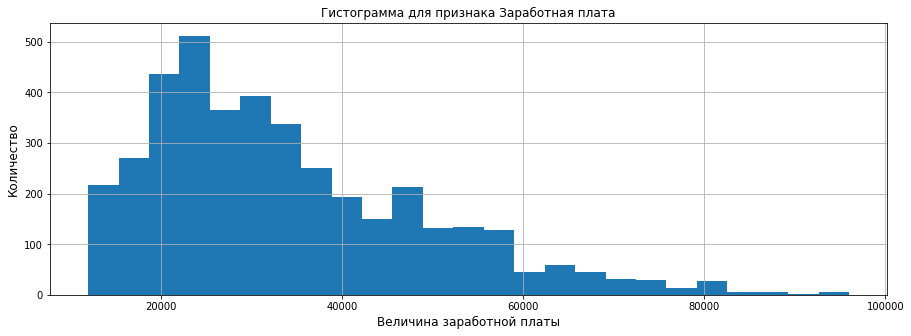

In [90]:
plt.figure(figsize=(15,5));
plt.hist(train_quit['salary'], bins=25);
plt.title('Гистограмма для признака Заработная плата');
plt.ylabel('Количество', fontsize='large');
plt.xlabel('Величина заработной платы',  fontsize='large');
plt.grid();

График имеет смещение влево.

Построим боксплот.

In [91]:
list_2 = ['salary']
titles_2 = ['Заработная плата']

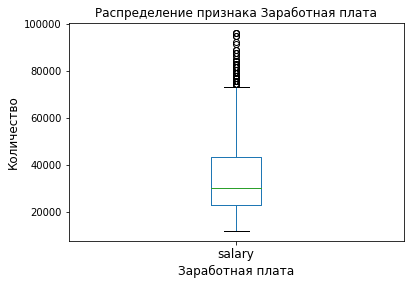

In [92]:
for i in range(len(list_2)):
    train_quit[list_2[i]].plot(kind='box');
    plt.title(f'Распределение признака {titles_2[i]}', fontsize='large');
    plt.xlabel(titles_2[i], fontsize='large');
    plt.ylabel('Количество', fontsize='large');
    plt.xticks(rotation=0, fontsize='large');
    plt.show()

**Вывод по числовым данным:**

- средняя заработная плата - чуть меньше 33805 , 
- только четверть сотрудников имеет зарплату больше 43200
- Ящик с усами показывает заработные платы выше 80000 как выбросы, то есть эти значения выше, чем 3 квартиль плюс 1,5 межквартильных размаха.
- максимальная зарплата 96000


*Данные сильно не отличаются от данных в задаче 1*

In [93]:
train_quit.head(1)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no


Теперь посмотрим на категориальные признаки

In [94]:
cat_col_2=['dept', 'level', 'workload', 'employment_years', 'last_year_promo', 'last_year_violations', 
           'supervisor_evaluation', 'quit']

titles_3= ['Отдел, в котором работает сотрудник', 'Уровень занимаемой должности', 'Уровень загруженности сотрудника', 
         'Длительность работы, лет','Было ли повышение за последний год', 
         'Нарушал ли сотрудник трудовой договор за последний год', 
         'Оценка качества работы сотрудника, которую дал руководитель', 'Увольнение сотрудника из компании']

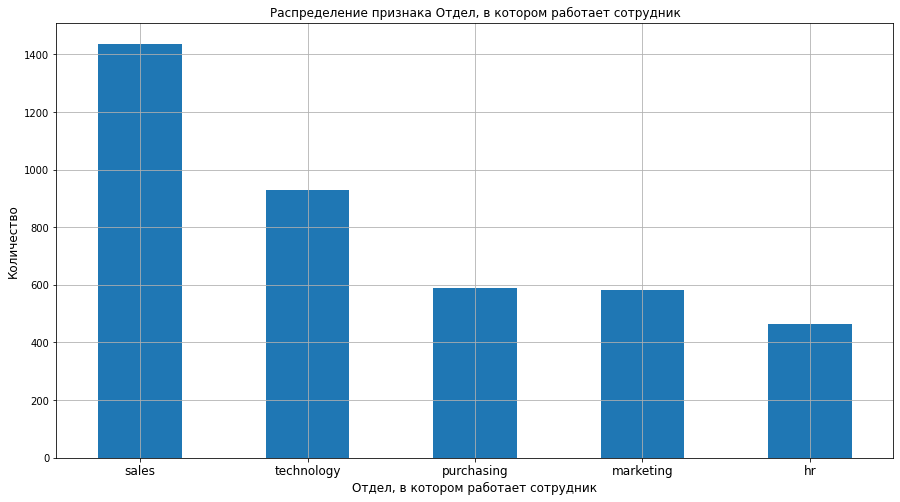

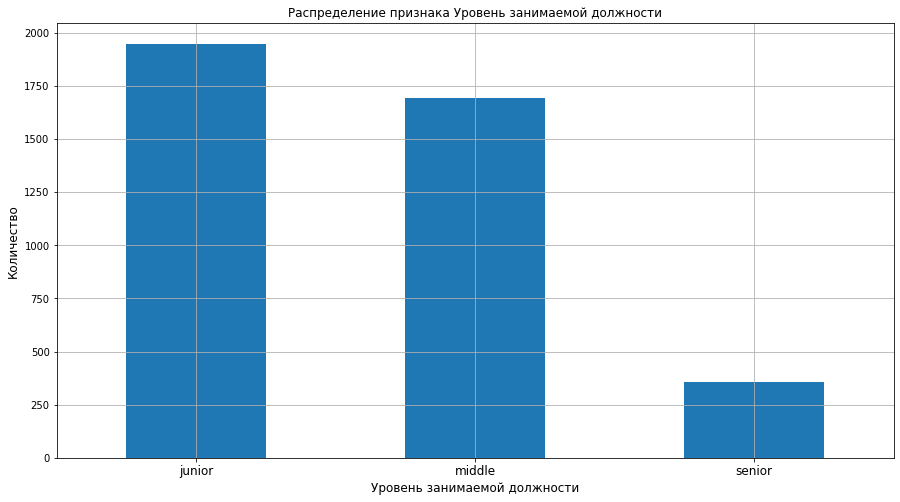

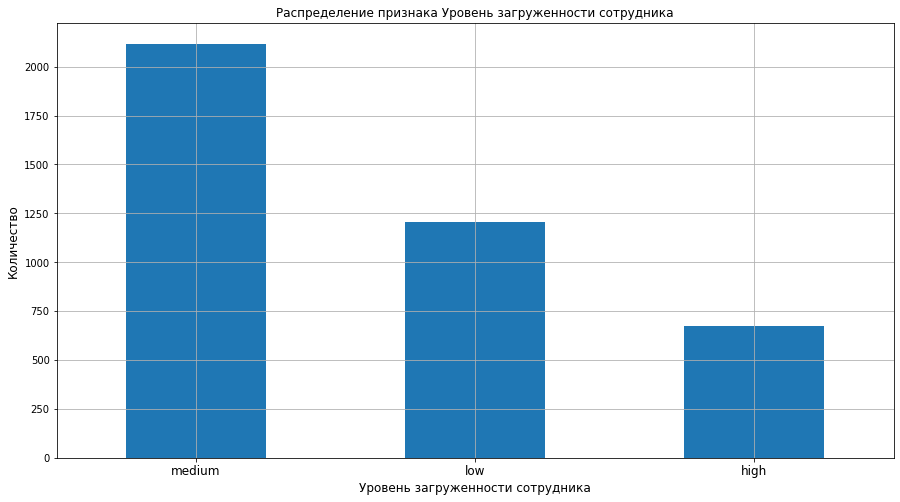

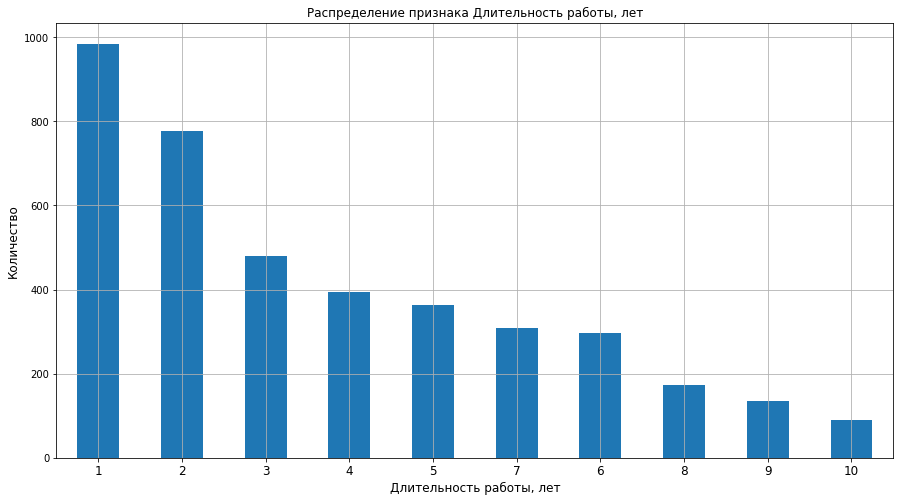

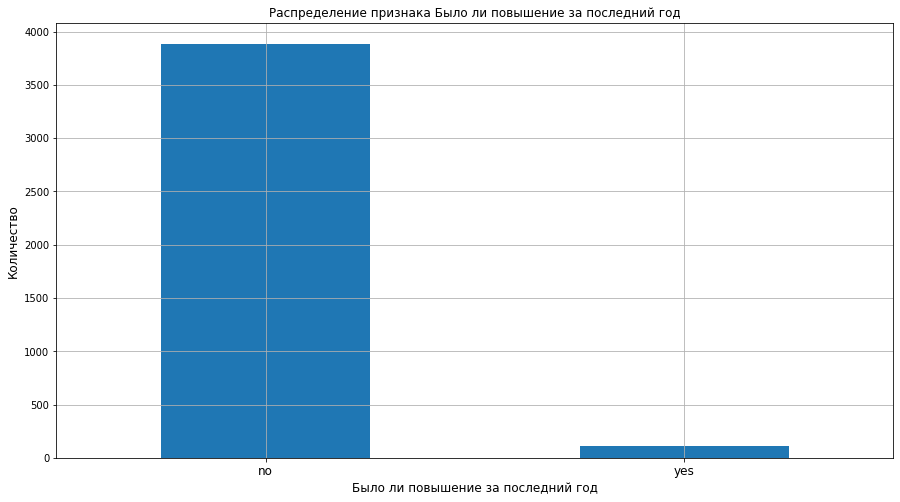

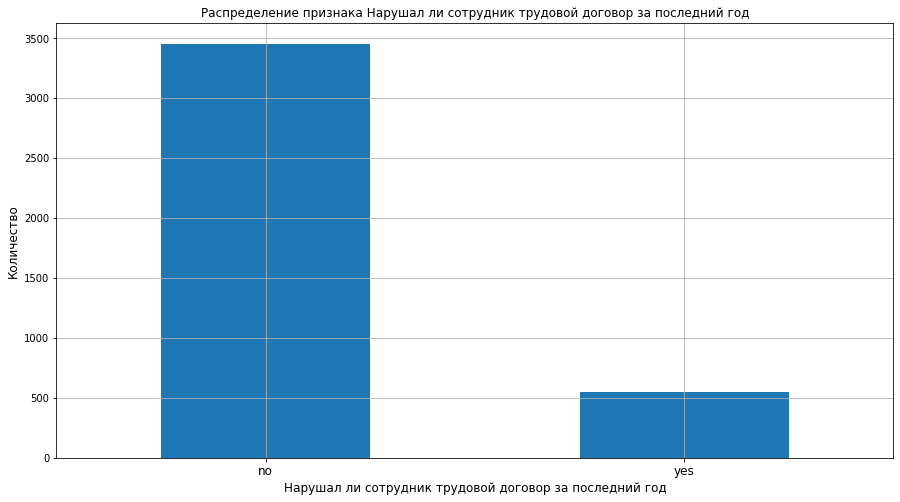

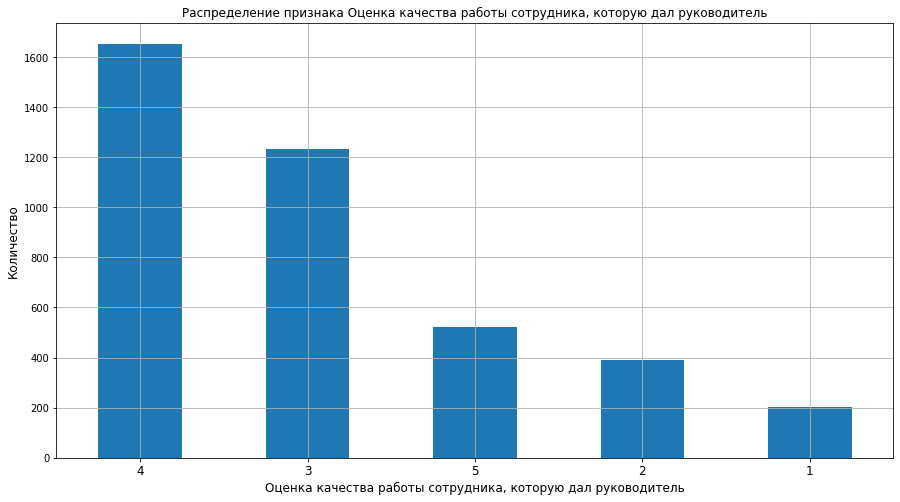

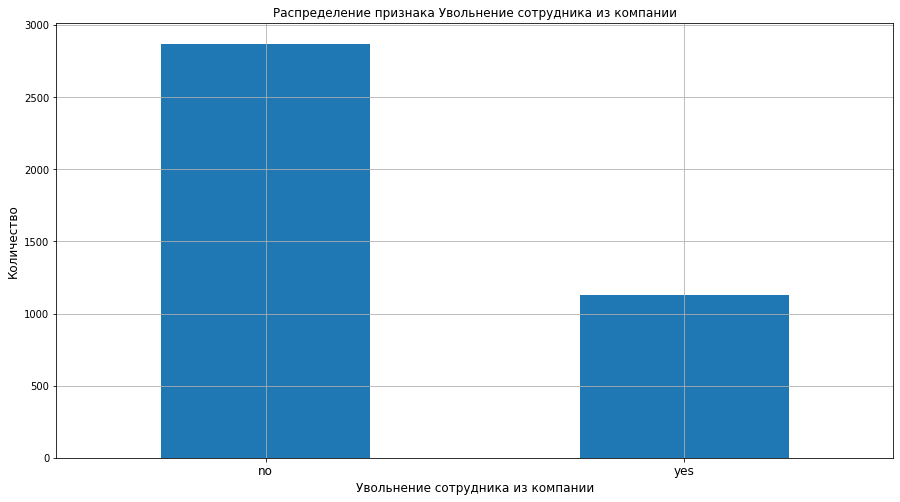

In [95]:
for i in range(len(cat_col_2)):
    train_quit[cat_col_2[i]].value_counts().plot(kind='bar', figsize=(15,8), grid=True);
    plt.title(f'Распределение признака {titles_3[i]}', fontsize='large');
    plt.xlabel(titles_3[i], fontsize='large');
    plt.ylabel('Количество', fontsize='large');
    plt.xticks(rotation=0, fontsize='large');
    plt.show()

**Промежуточный вывод:**
- распределения аналогичные выборке из задачи 1.


Построим матрицу корреляции признаков

Text(0.5, 1.0, 'Тепловой график корреляции признаков')

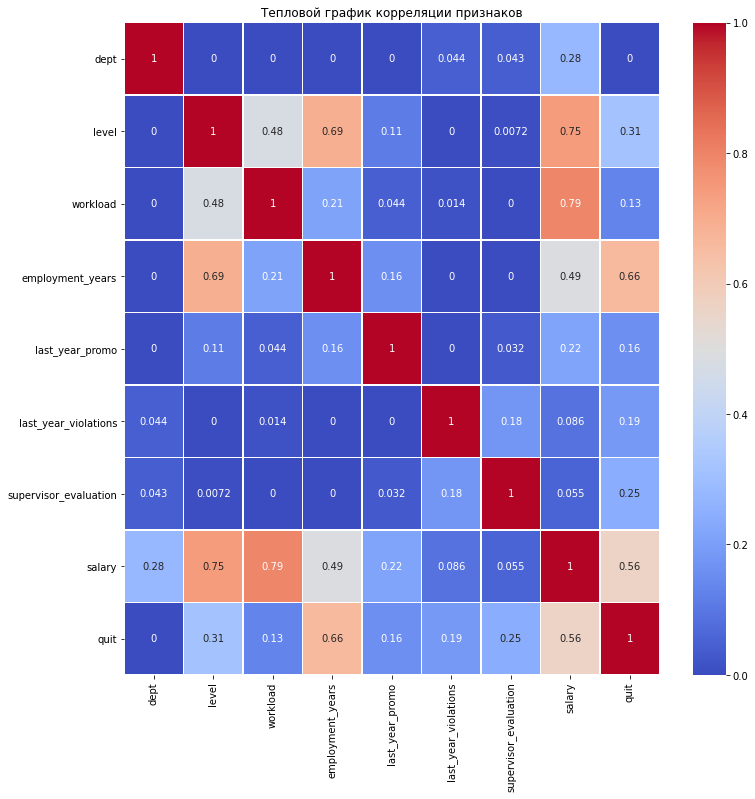

In [96]:
train_quit_1 =train_quit.drop(['id'], axis=1)
corr_matrix = train_quit_1.phik_matrix(interval_cols = num_col)
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Тепловой график корреляции признаков')



По корреляционному анализу видим: 
- целевой признак - зависит от количества проработанных лет и зарплаты.
- зарплата коррелирует с загруженностью и уровнем квалификации работника. 

Переходим к тестовой выборке. Входные признаки `test_features` мы изучили в Задаче 1. Теперь посмотрим на целевой признак.

In [97]:
test_target_quit.head(1)

,id,quit
0,999029,yes


Построим график целевого признака.

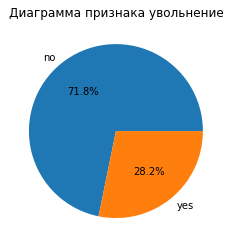

In [98]:
plt.pie(test_target_quit['quit'].value_counts(), labels = test_target_quit['quit'].value_counts().index, autopct='%1.1f%%');
plt.title('Диаграмма признака увольнение');

Целевой признак распределен неравномерно.

Построим совместные графики распределения числового признака тренировочной и тестовой выборок.

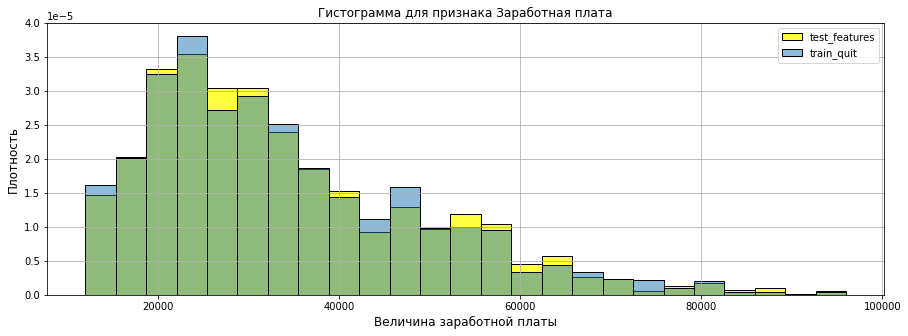

In [99]:
plt.figure(figsize=(15,5));
sns.histplot(test_features['salary'], bins=25, label = 'test_features',stat='density', common_norm=False, color='yellow');
sns.histplot(train_quit['salary'], bins=25, alpha = 0.5, label = 'train_quit', stat='density', common_norm=False);
plt.title('Гистограмма для признака Заработная плата');
plt.ylabel('Плотность', fontsize='large');
plt.xlabel('Величина заработной платы',  fontsize='large');
plt.grid();
plt.legend();

Распределение заработной платы в тестовой аналогичное тренировочной выборке.

In [100]:
train_quit['employment_years'].mean()

3.7015

**Вывод по исследовательскому анализу:**

- средняя заработная плата  - чуть меньше 34 тыс.
- средний рабочий стаж составляет 3.7 лет.
- большинство оценок руководителей - 4 (хорошо), на втором месте - оценка 3.
- работников уровня senior меньше всего
- нарушений малое количество, как и малое количество повышений
- большинство работников имеют среднюю загрузку.
- большинство работников - продавцы.
- отличий в распределении количественных данных в тестовой и тренировочной выборках не выявлено.


- целевой признак бинарный: количество категории yes - 28,2 %, no - 71,8 %. Распределен неравномерно.


### Портрет уволившегося сотрудника.

Теперь поделим тренировочную выборку на две категории с уволившимися сотрудниками и оставшимися.

In [101]:
train_quit_gone = train_quit.query('quit=="yes"')
train_quit_gone.head(5)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
5,699916,sales,junior,low,1,no,yes,3,18000,yes
9,613206,technology,middle,medium,2,no,no,3,45600,yes
24,468145,technology,junior,medium,2,no,no,3,30000,yes
25,982346,marketing,junior,medium,3,no,no,3,30000,yes


In [102]:
train_quit_remaining = train_quit.query('quit=="no"')
train_quit_remaining.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
4,910140,marketing,junior,medium,2,no,no,5,25200,no
6,417070,technology,middle,medium,8,no,no,2,44400,no


Посмотрим на describe уволившихся.

In [103]:
num_col_4=['salary']

In [104]:
train_quit_gone[num_col_4].describe().T

,count,mean,std,min,25%,50%,75%,max
salary,1128.0,23885.106383,9351.599505,12000.0,16800.0,22800.0,27600.0,79200.0


Описание describe для уволившихся:
- Средняя зарплата - 23885, 
- 3 четверти сотрудников имеют зарплату меньше 27600.

In [105]:
train_quit_remaining[num_col_4].describe().T

,count,mean,std,min,25%,50%,75%,max
salary,2872.0,37702.228412,15218.977339,12000.0,25200.0,34800.0,46800.0,96000.0


In [106]:
mean_salary = train_quit.pivot_table(index='quit', values = 'salary', aggfunc = 'mean').reset_index()
mean_salary.columns = ['Уволившийся, да/нет', 'Зарплата']
mean_salary

,"Уволившийся, да/нет",Зарплата
0,no,37702.228412
1,yes,23885.106383


Средняя зарплата уволившихся меньше средней зарплаты оставшихся.

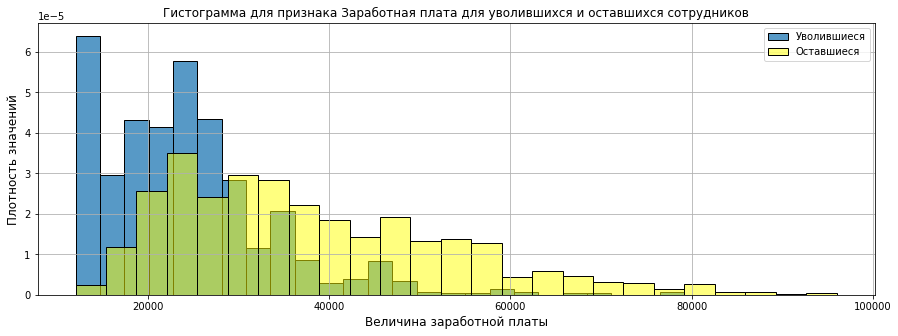

In [107]:
plt.figure(figsize=(15,5));
sns.histplot(train_quit_gone['salary'], bins=25, label = 'Уволившиеся',stat='density', common_norm=False);
sns.histplot(train_quit_remaining['salary'], bins=25, alpha=0.5, label = 'Оставшиеся',stat='density', common_norm=False, color='yellow')
plt.title('Гистограмма для признака Заработная плата для уволившихся и оставшихся сотрудников');
plt.ylabel('Плотность значений', fontsize='large');
plt.xlabel('Величина заработной платы',  fontsize='large');
plt.grid();
plt.legend();

**Промежуточный вывод:**
 - для уволившихся значения заработной платы на порядок меньше. Возможно по причине того, что данные по уволивишимся за предыдущие периоды.

Посмотрим на совместные графики категориальных переменных.

In [108]:
train_quit_gone.head(1)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
3,257132,sales,junior,medium,2,no,yes,3,24000,yes


In [109]:
cat_col_4=['dept', 'level', 'workload', 'employment_years', 'last_year_promo', 'last_year_violations', 
           'supervisor_evaluation']

titles_4= ['Отдел, в котором работает сотрудник', 'Уровень занимаемой должности', 'Уровень загруженности сотрудника', 
         'Длительность работы, лет','Было ли повышение за последний год', 
         'Нарушал ли сотрудник трудовой договор за последний год', 
         'Оценка качества работы сотрудника, которую дал руководитель']

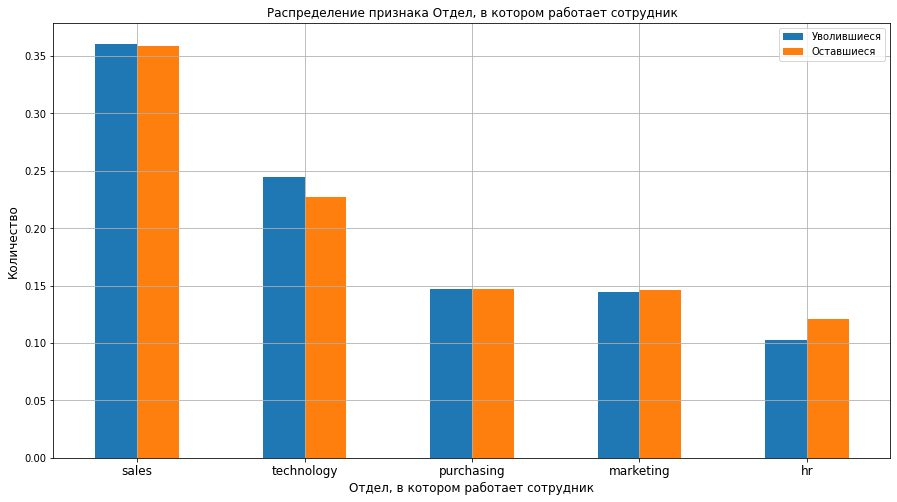

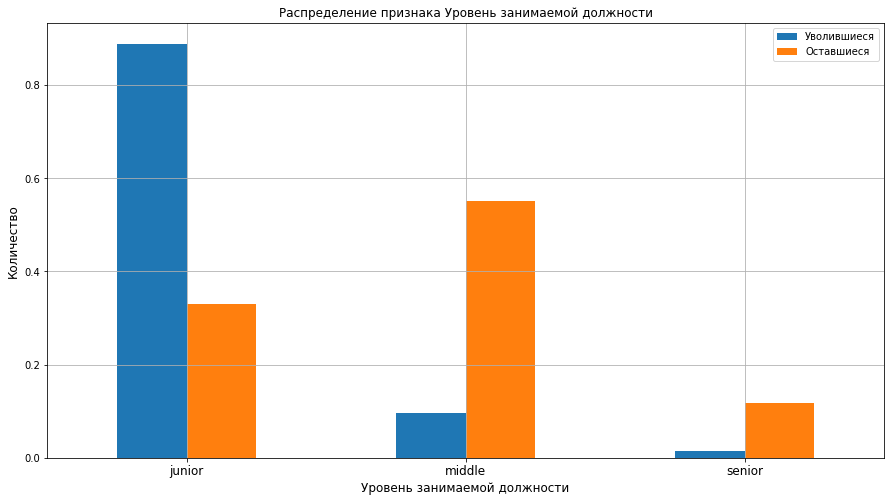

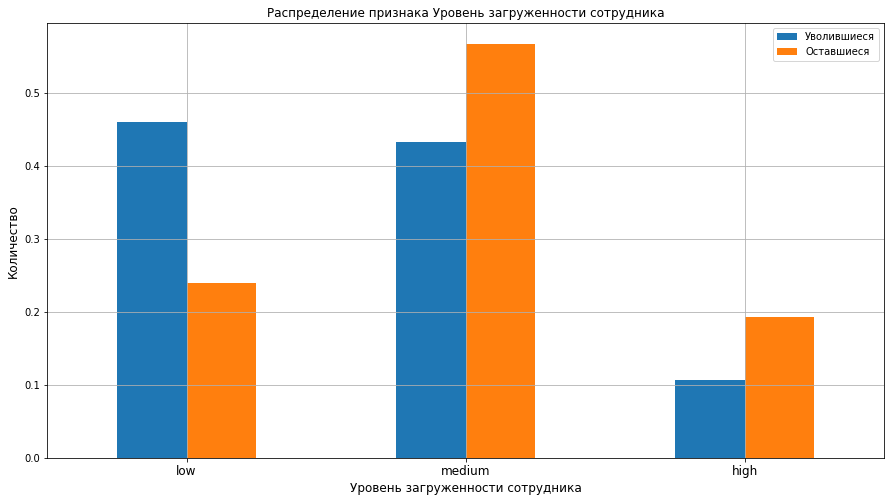

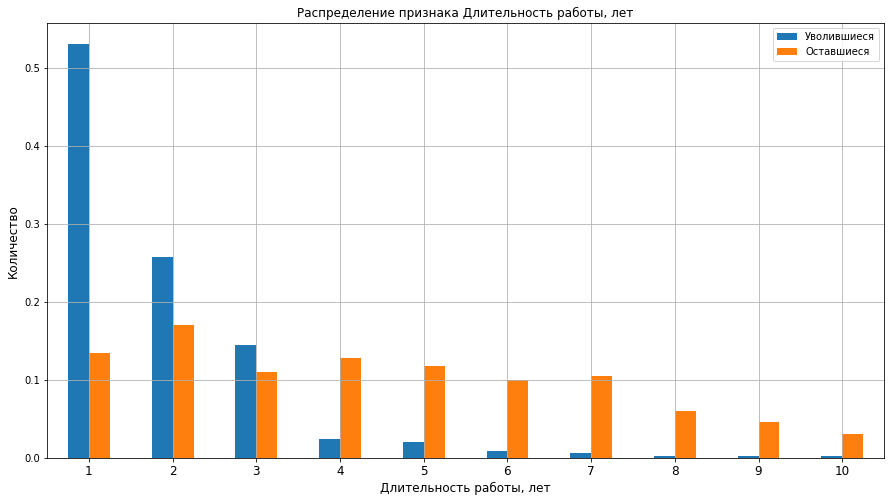

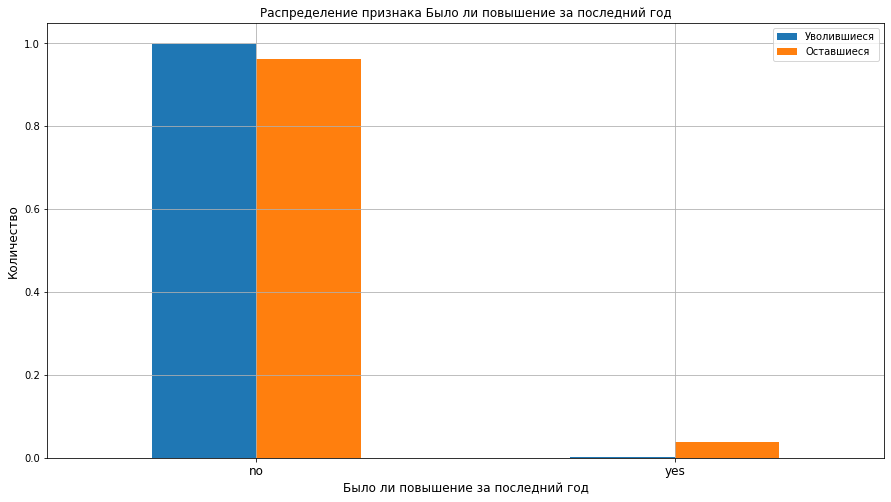

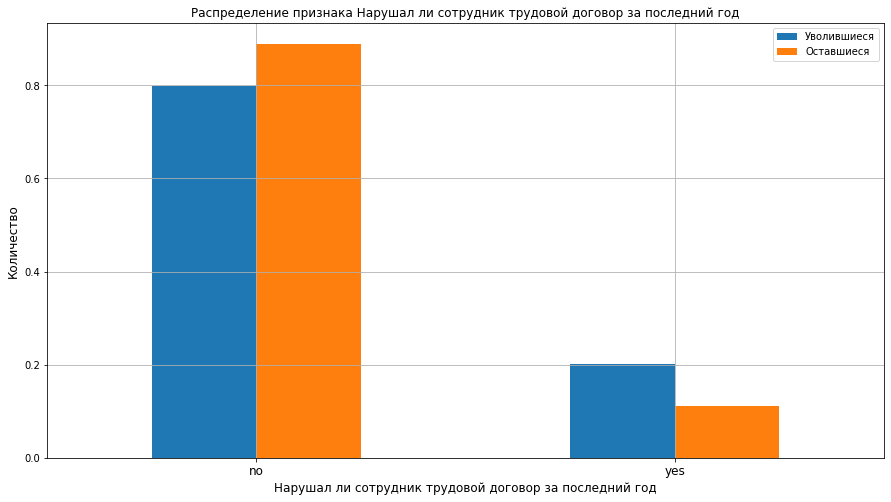

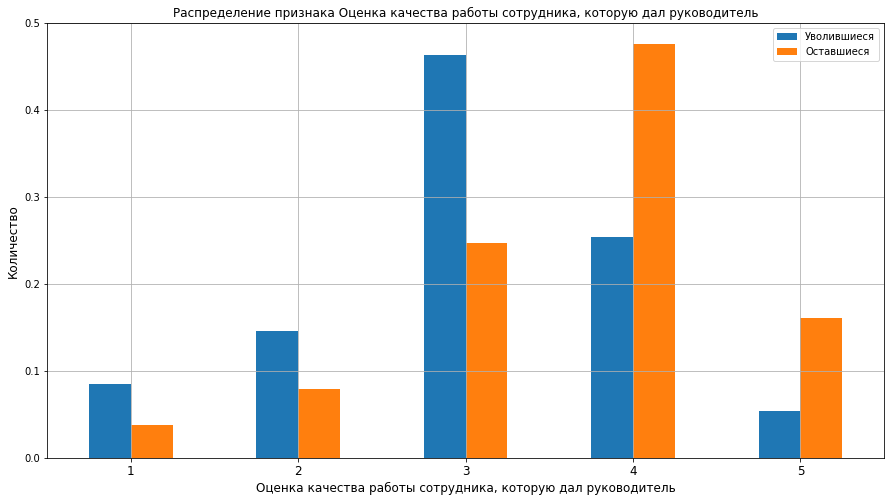

In [110]:
for i in range(len(cat_col_4)):
    df_1 = train_quit_gone[cat_col_4[i]].value_counts(normalize=True)
    df_2 = train_quit_remaining[cat_col_4[i]].value_counts(normalize=True)
    df_merge = pd.concat([df_1, df_2], axis=1)
    df_merge.columns = ['Уволившиеся', 'Оставшиеся']
    df_merge.plot(kind='bar', figsize=(15,8), grid=True);
    plt.title(f'Распределение признака {titles_4[i]}', fontsize='large');
    plt.xlabel(titles_4[i], fontsize='large');
    plt.ylabel('Количество', fontsize='large');
    plt.xticks(rotation=0, fontsize='large');
    plt.show()

**Выводы по портрету уволившегося сотрудника**

У уволившихся сотрудников следующие характеристики:
 - больше всего уволилось из отдела продаж (по сравнению с другими отделами)
 - джунов увольняется большее количество.
 - больше всего увольняются те, кто работает 1 год и меньше.Среди всех работников, кто работает более 3 лет - уволившихся очень малое количество по сравнению с оставшимися.
 - вообще не увольянются те, кто получил повышение в прошлом году
 - из всех уволившихся работников с оценкой руоводителя 3 больше всего.


### Уровень удовлетворенности ушедших и оставшихся.

In [111]:
df_1 = test_target.merge(test_target_quit, on='id')
df_yes=df_1[df_1['quit'] == 'yes']
df_no=df_1[df_1['quit'] == 'no']

In [112]:
df_yes.head(1)

,id,job_satisfaction_rate,quit
2,418490,0.6,yes


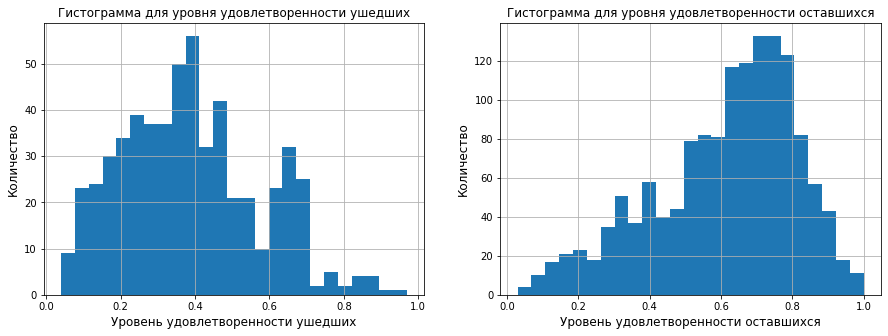

In [113]:
plt.figure(figsize=(15,5));

plt.subplot(1,2,1);
plt.hist(df_yes['job_satisfaction_rate'], bins=25);
plt.title('Гистограмма для уровня удовлетворенности ушедших');
plt.ylabel('Количество', fontsize='large');
plt.xlabel('Уровень удовлетворенности ушедших',  fontsize='large');
plt.grid();

plt.subplot(1,2,2);
plt.hist(df_no['job_satisfaction_rate'], bins=25);
plt.title('Гистограмма для уровня удовлетворенности оставшихся');
plt.ylabel('Количество', fontsize='large');
plt.xlabel('Уровень удовлетворенности оставшихся',  fontsize='large');
plt.grid();

**Вывод по разделу**
- В категории уволившихся гистограмма смещена влево от уровня 0.5, у категории оставшихся - вправо.
- Из вышеуказанного следует, что предположения аналитов верно - уровень удовлетворенности влияет на решение об увольнении.

Проверим это утверждение статистически.

 - **Нулевая гипотеза** - уровни удовлетворенности категорий уволившихся и оставшихся сотрудников равны

- **Альтернативная гипотеза** - уровень удовлетворенности уволившихся меньше уровня удовлетворенности оставшихся.

Проведем `ttest`

In [114]:
alpha = 0.05

df_yes_satisfaction = df_yes['job_satisfaction_rate']
df_no_satisfaction = df_no['job_satisfaction_rate']

results = st.ttest_ind(df_yes_satisfaction, df_no_satisfaction, alternative='less')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 6.155610332585965e-105
Отвергаем нулевую гипотезу


**Вывод** - предположения аналитиков верны. 
- нулевая гипотеза отвергнута в пользу альтернативной - уровень удовлетворенности уволившихся меньше уровня удовлетворенности оставшихся.

## Добавление нового входного признака.

Используем модель из первой задачи и добавим оценку удовлетворенности работой.

In [115]:
train_quit['job_satisfaction_rate'] = best_model.predict(train_quit)
train_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
0,723290,sales,middle,high,2,no,no,4,54000,no,0.647778
1,814010,sales,junior,medium,2,no,no,4,27600,no,0.846364
2,155091,purchasing,middle,medium,5,no,no,1,37200,no,0.340000
3,257132,sales,junior,medium,2,no,yes,3,24000,yes,0.340000
4,910140,marketing,junior,medium,2,no,no,5,25200,no,0.690000


## Подготовка данных. Задача 2.

Создадим пайплайн.

Будем использовать для подготовки следующие методы:
1. Кодирование:
    - для столбцов 'dept', last_year_promo', 'last_year_violations' - OneHotEncoder
    - для 'level', 'workload',  - OrdinalEncoder
2. масштабирование:
    - для 'employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate' - StandardScaler

Добавим в тестовую выборку с входными признаками колонку удовлетворенности работой с использованием предсказания модели.

In [116]:
test_features['job_satisfaction_rate'] = best_model.predict(test_features)

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [117]:
display(test_features.head(1))
test_features.shape

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,485046,marketing,junior,medium,2,no,no,5,28800,0.855


(2000, 10)

In [118]:
display(test_target_quit.head())
test_target_quit.shape

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


(2000, 2)

Проверим соответствуют ли id `test_target_quit` датафрейму `test_features`

In [119]:
test_target_quit['id'].isin(test_features['id']).sum()

2000

Входные и целевой признаки тестовой выборки соответствуют.

## Обучение модели. Задача 2.

### Лучшая модель.

In [120]:
all_test_data=test_features.merge(test_target_quit, on='id')

In [121]:
all_info(all_test_data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   dept                   1998 non-null   object 
 2   level                  1999 non-null   object 
 3   workload               2000 non-null   object 
 4   employment_years       2000 non-null   int64  
 5   last_year_promo        2000 non-null   object 
 6   last_year_violations   2000 non-null   object 
 7   supervisor_evaluation  2000 non-null   int64  
 8   salary                 2000 non-null   int64  
 9   job_satisfaction_rate  2000 non-null   float64
 10  quit                   2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 187.5+ KB


None

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
0,485046,marketing,junior,medium,2,no,no,5,28800,0.855000,no
1,686555,hr,junior,medium,1,no,no,4,30000,0.676667,no
2,467458,sales,middle,low,5,no,no,4,19200,0.652000,no
3,418655,sales,middle,low,6,no,no,4,19200,0.666000,no
4,789145,hr,middle,medium,5,no,no,5,40800,0.825556,no


Явные дубликаты: 0
Пропуски: id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
quit                     0
dtype: int64


In [122]:
train_9 = train_quit.drop(['id'], axis=1)
train_9.drop_duplicates(inplace=True)


In [123]:
X_train = train_9.drop('quit', axis=1)
y_train = train_9['quit'] 
X_test = all_test_data.drop(['quit','id'], axis=1)
y_test = all_test_data['quit']

In [124]:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level','workload',]
num_columns = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']

In [125]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test= label_encoder.transform(y_test)  

In [126]:
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
)

In [127]:
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'senior'],
                    ['low', 'medium', 'high'] 
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [128]:
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [129]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])
 


In [130]:
param_grid = [
     {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,10),
        'models__max_features': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
    
]

Метрику будем использовать ROC-AUC, так как она подходит для бинарной классификации с несбалансированной выборкой.

In [131]:
r_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

In [132]:
r_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               Pip...
                   param_distributions=[{'models': [KNeighborsClassifier()],
                                         'models__n_neighbors': range(2, 5),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [DecisionTreeClassifier(random_state=42)],
                                         'models__max_depth': range(2, 10),
                                         'models__max_features': range(2, 10),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [133]:
print('Лучшая модель и её параметры:\n\n', r_search.best_estimator_)
print(f'Параметры лучшей модели:\n{r_search.best_params_}')
print ('Метрика лучшей модели при кросс валидации:', round(r_search.best_score_, 4))

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                            

**Выбрана модель Дерева решений.**

Метрика при кросс-валидации составила **0.9028**

Проверим метрику на тестовой выборке

In [134]:
best_model_class = r_search.best_estimator_

In [135]:
roc_auc_score(y_test, best_model_class.predict_proba(X_test)[:,1])

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.911654344218574

In [136]:
print ('Метрика лучшей модели на тестовой выборке:', round(roc_auc_score(y_test, best_model_class.predict_proba(X_test)[:,1]),2))

Метрика лучшей модели на тестовой выборке: 0.91


/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Метрика на тестовой выборке составила **0.91**

### Альтернативные модели.

В качестве альтернативы обучим еще 2 модели. Используем наш пайплайн, рандомный поиск, только параметры будут другие.

*Первая альтернативная модель*

In [137]:
pipe_final_2 = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', KNeighborsClassifier())
])
 


In [138]:
param_grid_2 = {
    'models__n_neighbors': range(2,5),
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    }


In [139]:
grid = GridSearchCV(
    pipe_final_2, 
    param_grid=param_grid_2, 
    cv=5, 
    scoring='roc_auc', 
    n_jobs = -1
)


In [140]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('simpleImputer_ohe',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['dept',
                                                                          'last_year_promo',
                                                                          'last_year_violations']),
                                                                        ('ord',
                                                                         Pipeline(...
                                                                                         ('simpleImputer_after_ord',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['level',
                                                                          'workload']),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['employment_years',
                                                                          'supervisor_evaluation',
                                                                          'salary',
                                                                          'job_satisfaction_rate'])])),
                                       ('models', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'models__n_neighbors': range(2, 5),
                         'preprocessor__num': [StandardScaler(), MinMaxScaler(),
                                               'passthrough']},
             scoring='roc_auc')

In [141]:
print('Альтернативная модель и её параметры:\n\n', grid.best_estimator_)
print(f'Параметры альтернативной модели:\n{grid.best_params_}')
print ('Метрика альтернативной модели при кросс-валидации:', round(grid.best_score_, 4))

Альтернативная модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                    

Метрика при кросс-валидации составила 0.8705 

*Вторая альтернативная модель*

In [142]:
pipe_final_3 = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LogisticRegression(random_state=RANDOM_STATE, penalty='l1', solver='saga'))
])
 


In [143]:
param_grid_3 = {
    'models__C': [0.1,0.4,0.5,0.6,1,2,4,6,10],
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    }


In [144]:
grid_3 = GridSearchCV(
    pipe_final_3, 
    param_grid=param_grid_3, 
    cv=5, 
    scoring='roc_auc', 
    n_jobs = -1
)


In [145]:
grid_3.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('simpleImputer_ohe',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['dept',
                                                                          'last_year_promo',
                                                                          'last_year_violations']),
                                                                        ('ord',
                                                                         Pipeline(...
                                                                         ['level',
                                                                          'workload']),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['employment_years',
                                                                          'supervisor_evaluation',
                                                                          'salary',
                                                                          'job_satisfaction_rate'])])),
                                       ('models',
                                        LogisticRegression(penalty='l1',
                                                           random_state=42,
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'models__C': [0.1, 0.4, 0.5, 0.6, 1, 2, 4, 6, 10],
                         'preprocessor__num': [StandardScaler(), MinMaxScaler(),
                                               'passthrough']},
             scoring='roc_auc')

In [146]:
print('Альтернативная модель и её параметры:\n\n', grid_3.best_estimator_)
print(f'Параметры альтернативной модели:\n{grid_3.best_params_}')
print ('Метрика альтернативной модели при кросс-валидации:', round(grid_3.best_score_, 4))

Альтернативная модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                    

Метрика при кросс-валидации составила 0.9031 

**Вывод по обучению моделей:**
1. При помощи пайплайна и RandomizedSearch выбрана и обучена лучшая модель - **Дерево решений** с гиперпараметрами:
    - max_depth=5, max_features=6, random_state=42).
2. Метрика выбрана ROC-AUC так как она подходит для бинарной классификации с несбалансированной выборкой.
3. Метрика лучшей модели на тестовой выборке составила **0.91** - соответствует условию из брифа (>=0.91)
4. Также обучены альтернативыне модели: KNeighborsClassifier и LogisticRegression, метрика ROC-AUC при кросс-валидации по которым составила:
    - KNeighborsClassifier - 0.8705
    - LogisticRegression - 0.9031

Оценим модель на адекватность.

Обучим Dummy модель.

In [147]:
dummy_model = DummyClassifier(random_state=RANDOM_STATE)
dummy_model.fit(X_train, y_train)

DummyClassifier(random_state=42)

In [148]:
dummy_model_predict = dummy_model.predict(X_test)

In [153]:
dummy_roc_auc = cross_val_score(dummy_model, X_train, y_train, scoring='roc_auc').mean()

In [154]:
print('ROC-AUC при кросс валидации:', round(dummy_roc_auc, 2))

ROC-AUC при кросс валидации: 0.5


Теперь оценим на тестовой выборке.

In [155]:
dummy_test = roc_auc_score(y_test, dummy_model_predict)
print('ROC-AUC на тестовой выборке:', round(dummy_test,2))

ROC-AUC на тестовой выборке: 0.5


Метрики Dummy хуже метрик лучшей модели.

## Общий вывод по работе.

Проведено исследование для HR-аналитиков компании «Работа с заботой», в ходе которой решено 2 задачи.

**Задачи проекта были следующие:**

1. Построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. 


Почему бизнесу это важно: удовлетворённость работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник.


2. Построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

Для решения задач были предоставлены следующие данные:

*Задача 1: предсказание уровня удовлетворённости сотрудника*


Для этой задачи заказчик предоставил данные с признаками:
- id — уникальный идентификатор сотрудника;
- dept — отдел, в котором работает сотрудник;
- level — уровень занимаемой должности;
- workload — уровень загруженности сотрудника;
- employment_years — длительность работы в компании (в годах);
- last_year_promo — показывает, было ли повышение за последний год;
- last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
- supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
- salary — ежемесячная зарплата сотрудника;
- job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.


*Задача 2: предсказание увольнения сотрудника из компании.*


Для этой задачи вы можете использовать те же входные признаки, что и в предыдущей задаче. Однако целевой признак отличается: 
- quit — увольнение сотрудника из компании.

**В ХОДЕ РАБОТЫ БЫЛИ ВЫПОЛНЕНЫ СЛЕДУЮЩИЕ ЭТАПЫ:**

**Задача 1**
1. Загрузка данных.
2. Предобработка данных. 
    - Пустые значения заменены на np.nan
    - Исправлена опечатка sinior на `senior`
    
    
3. Исследовательский анализ - 1 задача. В ходе анализа сделаны слудющие выводы:
    - целевой признак не имеет нормального распределения. Стандартное отклонение признака - 0.225
    - средняя заработная плата  - чуть меньше 34 тыс.
    - средний рабочий стаж составляет 3.72 года.
    - большинство оценок руководителей - 4 (хорошо), на втором месте - оценка 3.
    - работников уровня senior меньше всего
    - нарушений малое количество, как и малое количество повышений
    - большинство работников имеют среднюю загрузку.
    - большинство работников - продавцы.
    - отличий в распределении данных в тестовой и тренировочной выборках не выявлено.
    

4. Подготовка данных. 
    - Создан пайплайн для построения модели.
    
    
5. Обучение модели. Задача 1. 
    - Создана кастомная метрика SMAPE.
    - Обучены модели.
    
**ОБЩИЙ ВЫВОД ПО ЗАДАЧЕ 1:**
1. С помощью рандомного поиска RandomizedSearch подбором гиперпараметров двух моделей и методов кодирования, масштабирования выбрана модель 
    
    **Дерева решений.**, со следующими гиперпараметрами: 
        - (max_depth=16, max_features=12, min_samples_split=13,random_state=42))])
2. На тестовой выборке метрика лучшей модели показала - **13.65** 
    
**Задача 2**


6. Загрузка данных. Задача 2. 
7. Предобработка данных. Задача 2.
    - Пустые значения заменены на np.nan
    - Исправлена опечатка sinior на `senior`
    
    
8. Исследовательский анализ. Задача 2. 


    8.1 Составлен портрет уволившегося сотрудника. У уволившихся сотрудников следующие характеристики:
        - больше всего уволилось из отдела продаж (по сравнению с другими отделами)
        - джунов увольняется большее количество.
        - больше всего увольянются те, кто работает 1 год и меньше. Оставшихся работников со стажем 2 года больше, чем уволившихся с аналогичным стажем.
        - вообще не увольянются те, кто получил повышение в прошлом году
        - из всех уволившихся работников с оценкой руоводителя 3 больше всего.
        
        
    8.2 Уровень удовлетворенности ушедших и оставшихся. 
        - Проведено сравнение удовлетворенности работой уволившихся и оставшихся сотрудников, вывод следующий:
        - Ппредположенея аналитов верно - уровень удовлетворенности влияет на решение об увольнении.
9. Добавление нового входного признака. 
10. Подготовка данных. Задача 2. 
    - Построен пайплайн.
11. Обучение модели. Задача 2. 
    - Обучены модели.


**ОБЩИЙ ВЫВОД ПО ЗАДАЧЕ 2:**
1. С помощью рандомного поиска RandomizedSearch подбором гиперпараметров двух моделей и методов кодирования, масштабирования выбрана модель 
    
    **Дерева решений.**, со следующими гиперпараметрами: 
            - max_depth=5, max_features=6, random_state=42).
2. На тестовой выборке метрика лучшей модели показала - **0.91** 


3. Альтернативные модели показали худший результат.


**Рекомендации заказчику:**

1. Текучка кадров происходит у работников, которые работают меньше года и больше всего среди Junior специалистов.

2. Уровень удовлетворенности влияет на решение сотрудника об увольнении. Компании нужно уделить внимание на повышение уровня удовлетворенности: повысить зарплаты и уменьшать загруженность. Также влияет на решение об увольнение факты повышения сотрудников. Исходя из графиков, в категории кого повысили в прошлом году не имеется ни одного уволившегося.